# Bike Sharing 数据集上的回归分析

1、 任务描述 请在Capital Bikeshare （美国Washington, D.C.的一个共享单车公司）提供的自行车数据上进行回归分析。训练数据为2011年的数据，要求预测2012年每天的单车共享数量。

原始数据集地址：http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset 1) 文件说明 
day.csv: 按天计的单车共享次数（作业只需使用该文件） 
hour.csv: 按小时计的单车共享次数（无需理会） 
readme：数据说明文件

2) 字段说明 
Instant记录号 
Dteday：日期 
Season：季节（1=春天、2=夏天、3=秋天、4=冬天） 
yr：年份，(0: 2011, 1:2012) 
mnth：月份( 1 to 12) 
hr：小时 (0 to 23) （只在hour.csv有，作业忽略此字段） 
holiday：是否是节假日 
weekday：星期中的哪天，取值为0～6 
workingday：是否工作日 1=工作日 （是否为工作日，1为工作日，0为非周末或节假日 weathersit：天气（1：晴天，多云 2：雾天，阴天 3：小雪，小雨 4：大雨，大雪，大雾） temp：气温摄氏度 
atemp：体感温度 
hum：湿度 
windspeed：风速 

casual：非注册用户个数 
registered：注册用户个数 
cnt：给定日期（天）时间（每小时）总租车人数，响应变量y
casual、registered和cnt三个特征均为要预测的y，作业里只需对cnt进行预测

In [1]:
# 导入必要的工具包
# 数据读取及基本处理
import pandas as pd
import numpy as np

#模型
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

#模型评估
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score  #评价回归预测模型的性能

#可视化
import matplotlib.pyplot as plt

In [2]:
# 读入数据
dpath = "./data/"
data = pd.read_csv(dpath + "FE_day.csv")

data.head()

,instant,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,...,weekday_5,weekday_6,temp,atemp,hum,windspeed,holiday,workingday,yr,cnt
0,1,1,0,0,0,1,0,0,0,0,...,0,1,0.355170,0.373517,0.828620,0.284606,0,0,0,985
1,2,1,0,0,0,1,0,0,0,0,...,0,0,0.379232,0.360541,0.715771,0.466215,0,0,0,801
2,3,1,0,0,0,1,0,0,0,0,...,0,0,0.171000,0.144830,0.449638,0.465740,0,1,0,1349
3,4,1,0,0,0,1,0,0,0,0,...,0,0,0.175530,0.174649,0.607131,0.284297,0,1,0,1562
4,5,1,0,0,0,1,0,0,0,0,...,0,0,0.209120,0.197158,0.449313,0.339143,0,1,0,1600


**准备训练数据**

In [3]:
# get labels
y = data['cnt']   
X = data.drop(['cnt'], axis=1)

In [4]:
# 用train_test_split 分割训练数据和测试数据
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,random_state = 0)

print("train samples:" ,X_train.shape)

('train samples:', (584, 34))


/Users/qing/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
#保存测试ID，用于结果提交
testID = X_test['instant']

#ID不参与预测
X_train.drop(['instant'], axis=1, inplace = True)
X_test.drop(['instant'], axis=1, inplace = True)

#保存特征名字以备后用（可视化）
feat_names = X_train.columns

/Users/qing/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/qing/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**1* Linear Regression without regularization**
最小二乘线性回归
最小二乘没有超参数需要调优，直接用全体训练数据训练模型

In [6]:
# Linear Regression
# 1. 生成学习器实例
lr = LinearRegression()

#2. 在训练集上训练学习器
lr.fit(X_train, y_train)

#3.用训练好的学习器对训练集/测试集进行预测
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
print("RMSE on Training set :", rmse_train)
print("RMSE on Test set :", rmse_test)

r2_score_train = r2_score(y_train,y_train_pred)
r2_score_test = r2_score(y_test,y_test_pred)
print("r2_score on Training set :", r2_score_train)
print("r2_score on Test set :", r2_score_test)

('RMSE on Training set :', 752.2680695747443)
('RMSE on Test set :', 785.8666817845859)
('r2_score on Training set :', 0.843672397252329)
('r2_score on Test set :', 0.8547929221002888)


In [7]:
lr.coef_.shape

(33,)

OLS picked 33 features and eliminated the other 0 features


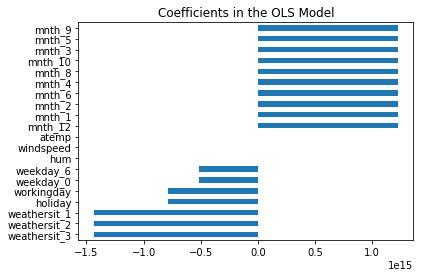

In [8]:
# Plot important coefficients
coefs = pd.Series(lr.coef_, index = feat_names)
print("OLS picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")

#正系数值最大的10个特征和负系数值最小（绝对值大）的10个特征
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the OLS Model")
plt.show()

In [9]:
coefs

season_1        5.713590e+12
season_2        5.713590e+12
season_3        5.713590e+12
season_4        5.713590e+12
mnth_1          1.226538e+15
mnth_2          1.226538e+15
mnth_3          1.226538e+15
mnth_4          1.226538e+15
mnth_5          1.226538e+15
mnth_6          1.226538e+15
mnth_7          1.226538e+15
mnth_8          1.226538e+15
mnth_9          1.226538e+15
mnth_10         1.226538e+15
mnth_11         1.226538e+15
mnth_12         1.226538e+15
weathersit_1   -1.436901e+15
weathersit_2   -1.436901e+15
weathersit_3   -1.436901e+15
weekday_0      -5.118899e+14
weekday_1       2.731062e+14
weekday_2       2.731062e+14
weekday_3       2.731062e+14
weekday_4       2.731062e+14
weekday_5       2.731062e+14
weekday_6      -5.118899e+14
temp            2.823812e+03
atemp           1.069812e+03
hum            -1.885438e+03
windspeed      -1.512312e+03
holiday        -7.849960e+14
workingday     -7.849960e+14
yr              1.938625e+03
dtype: float64

系数的值非常大。由于特征之间强相关，OLS模型的性能并不好

**2* Linear Regression with Ridge regularization (L2 penalty)**

In [10]:
#RidgeCV缺省的score是mean squared errors 
# 1. 设置超参数搜索范围，生成学习器实例
# RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, scoring=None, cv=None, gcv_mode=None, store_cv_values=False)
alphas = [0.01, 0.1, 1, 10, 100, 1000]
ridge = RidgeCV(alphas = alphas,store_cv_values=True )

# 2. 用训练数据度模型进行训练
# RidgeCV采用的是广义交叉验证（Generalized Cross-Validation），留一交叉验证（N-折交叉验证）的一种有效实现方式
ridge.fit(X_train, y_train)

#通过交叉验证得到的最佳超参数alpha
alpha = ridge.alpha_
print("Best alpha :", alpha)

# 交叉验证估计的测试误差
mse_cv = np.mean(ridge.cv_values_, axis = 0)
rmse_cv = np.sqrt(mse_cv)
print("cv of rmse :",rmse_cv)

#训练上测试，训练误差，实际任务中这一步不需要
y_train_pred = ridge.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))

y_test_pred = ridge.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))

print("RMSE on Training set :", rmse_train)
print("RMSE on Test set :" ,rmse_test)

r2_score_train = r2_score(y_train,y_train_pred)
r2_score_test = r2_score(y_test,y_test_pred)
print("r2_score on Training set :" ,r2_score_train)
print("r2_score on Test set :" ,r2_score_test)

('Best alpha :', 1.0)
('cv of rmse :', array([ 804.98946948,  801.06246694,  797.95313648,  822.15888399,
       1078.04194503, 1680.07803178]))
('RMSE on Training set :', 754.0366623762025)
('RMSE on Test set :', 776.9753607133744)
('r2_score on Training set :', 0.8429364764067768)
('r2_score on Test set :', 0.8580600896877647)


Ridge picked 33 features and eliminated the other 0 features


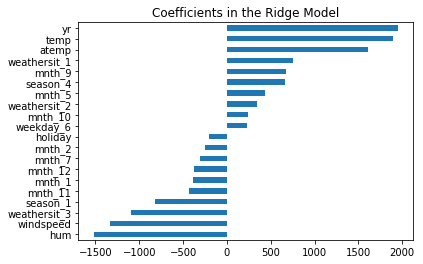

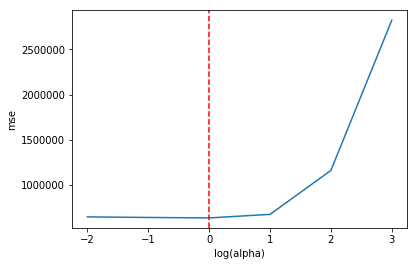

In [16]:
# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = feat_names)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")

#正系数值最大的10个特征和负系数值最小（绝对值大）的10个特征
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

mse_mean = np.mean(ridge.cv_values_, axis = 0)
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas),1)) 

#最佳超参数
plt.axvline(np.log10(ridge.alpha_), color='r', ls='--')

plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

In [12]:
coefs

season_1        -816.946054
season_2          61.439057
season_3          97.124573
season_4         658.382424
mnth_1          -384.604861
mnth_2          -255.398769
mnth_3           185.553801
mnth_4            -6.012570
mnth_5           437.523845
mnth_6           104.170972
mnth_7          -307.981162
mnth_8           129.351248
mnth_9           670.800620
mnth_10          235.474439
mnth_11         -428.094512
mnth_12         -380.783051
weathersit_1     757.284463
weathersit_2     341.945472
weathersit_3   -1099.229935
weekday_0       -166.919676
weekday_1       -155.850725
weekday_2        -48.116950
weekday_3         -4.759450
weekday_4         64.295894
weekday_5         87.446625
weekday_6        223.904283
temp            1892.310062
atemp           1605.349484
hum            -1520.738791
windspeed      -1336.567102
holiday         -202.590794
workingday       145.606188
yr              1952.328786
dtype: float64

相比OLS，岭回归模型增加了L2正则，系数值进行了收缩。
由于增加正则限制了模型复杂的，相比比OLS模型，岭回归模型在训练集上的误差略有增大，但在测试集上的误差有所减小。

**3* Linear Regression with Lasso regularization (L1 penalty)**

('Best alpha :', 2.336453166053946)
('cv of rmse :', 828.5550460506792)
Lasso picked 27 features and eliminated the other 6 features


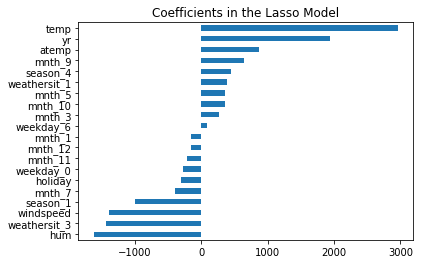

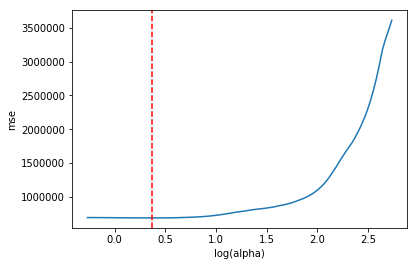

('RMSE on Training set :', 754.2656275844785)
('RMSE on Test set :', 786.623058576428)
('r2_score on Training set :', 0.8428410764237866)
('r2_score on Test set :', 0.8545132713117076)


In [15]:
# 3* Lasso
#1. 生成学习器实例，LassoCV默认参数可自动确定alpha的搜素范围
lasso = LassoCV()

#2.模型训练
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :" , alpha)

#3. 模型性能：cv
mse_cv = np.mean(lasso.mse_path_, axis = 1)
rmse_cv = np.sqrt(mse_cv)
print("cv of rmse :", min(rmse_cv))

# 4. 特征重要性
#Plot important coefficients
coefs = pd.Series(lasso.coef_, index = feat_names)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

#5. 显示不同alpha对应的模型性能
plt.plot(np.log10(lasso.alphas_), mse_cv) 
#最佳超参数
plt.axvline(np.log10(lasso.alpha_), color='r', ls='--')

plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show() 

#训练误差
y_train_pred = lasso.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
print("RMSE on Training set :" ,rmse_train)

#测试误差
y_test_pred = lasso.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
print("RMSE on Test set :" ,rmse_test)

r2_score_train = r2_score(y_train,y_train_pred)
r2_score_test = r2_score(y_test,y_test_pred)
print("r2_score on Training set :" , r2_score_train)
print("r2_score on Test set :" , r2_score_test)

In [14]:
coefs

season_1        -991.864539
season_2          -0.000000
season_3           0.000000
season_4         448.139977
mnth_1          -152.357646
mnth_2           -46.677131
mnth_3           272.393334
mnth_4            -0.000000
mnth_5           364.227409
mnth_6             0.000000
mnth_7          -395.772042
mnth_8            10.784305
mnth_9           641.369561
mnth_10          352.506349
mnth_11         -209.768543
mnth_12         -153.539040
weathersit_1     388.138775
weathersit_2      -0.000000
weathersit_3   -1429.882687
weekday_0       -273.619964
weekday_1       -134.265169
weekday_2        -22.758843
weekday_3         -0.000000
weekday_4         47.064979
weekday_5         77.322211
weekday_6         82.220008
temp            2964.600668
atemp            863.906434
hum            -1618.968372
windspeed      -1382.149139
holiday         -301.586913
workingday         1.389914
yr              1941.529523
dtype: float64

Lasso模型增加了L1正则，系数值进行了收缩，同时有些特征的系数为0。
在这个例子中，岭回归模型比Lasso模型性能稍好。

## 对测试集进行测试，生成提交文件

In [15]:
y_test_pred = ridge.predict(X_test)

#生成提交测试结果
df = pd.DataFrame({"instant":testID, 'cnt':y_test_pred})
df.to_csv('submission.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 196 to 239
Data columns (total 2 columns):
cnt        147 non-null float64
instant    147 non-null int64
dtypes: float64(1), int64(1)
memory usage: 3.4 KB
